In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Company_Data.csv')

In [99]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [42]:
data[data['Sales'].duplicated().sort_values(ascending=True)].sort_values(by=['Sales'],ascending=True)

/tmp/ipykernel_8414/2701235551.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Sales'].duplicated().sort_values(ascending=True)].sort_values(by=['Sales'],ascending=True)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
258,3.47,108,38,0,251,81,Bad,72,14,No,No
381,3.90,124,65,21,496,151,Bad,77,13,Yes,Yes
202,4.10,121,78,4,413,130,Bad,46,10,No,Yes
224,4.10,134,82,0,464,141,Medium,48,13,No,No
83,4.42,109,36,7,468,94,Bad,56,11,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
329,11.27,100,54,9,433,89,Good,45,12,Yes,Yes
169,11.48,104,41,15,492,77,Good,73,18,Yes,Yes
325,11.70,144,69,11,131,104,Medium,47,11,Yes,Yes
171,12.49,93,106,12,416,55,Medium,75,15,Yes,Yes


In [50]:
X=data.drop('Sales',axis=1)
y=data["Sales"]

In [59]:
data.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [100]:
#Encoding- Label Encoding should be suitable here as we dont need to define different variables and increase the space complexity of the features though
#we can argue that ShelveLoc can be used as OHE variable

# Define features that need encoding
categorical_features = ['ShelveLoc','Urban','US']



In [114]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [119]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer



# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OrdinalEncoder(), categorical_features),
    ],
    remainder='passthrough'  
)

X_transformed=preprocessor.fit_transform(X[categorical_features])

In [120]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [128]:
#To perform Binning on the Target Varible i.e Sales Either we can do is a frequency based or an Equal size based binning, best option is to use a standard Optimal libraray for this job.
X_transformed=pd.DataFrame(X_transformed,columns=categorical_features)
X_transformed
# ShelveLoc->     Bad=0 | Good=1 | Medium=2
# Urban->    Yes=1  | No=0
# US->       Yes=1  | No=0


,ShelveLoc,Urban,US
0,0.0,1.0,1.0
1,1.0,1.0,1.0
2,2.0,1.0,1.0
3,2.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
395,1.0,1.0,1.0
396,2.0,0.0,1.0
397,2.0,1.0,1.0
398,0.0,1.0,1.0


In [140]:
X.drop(columns=categorical_features,axis=1,inplace=True)
X=X.assign(**X_transformed)


In [141]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,0.0,1.0,1.0
1,111,48,16,260,83,65,10,1.0,1.0,1.0
2,113,35,10,269,80,59,12,2.0,1.0,1.0
3,117,100,4,466,97,55,14,2.0,1.0,1.0
4,141,64,3,340,128,38,13,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1.0,1.0,1.0
396,139,23,3,37,120,55,11,2.0,0.0,1.0
397,162,26,12,368,159,40,18,2.0,1.0,1.0
398,100,79,7,284,95,50,12,0.0,1.0,1.0


/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

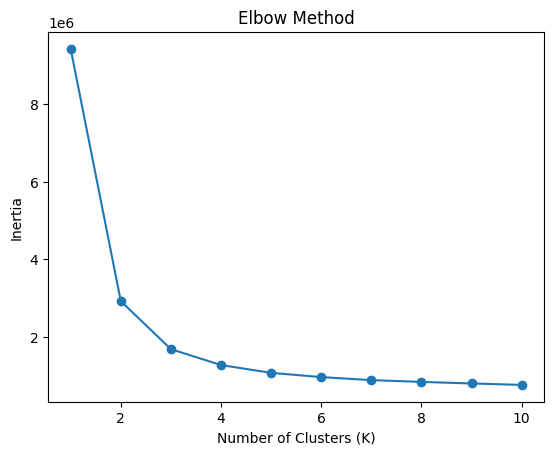

In [142]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [162]:
from sklearn.cluster import KMeans

K=4
kmeans = KMeans(n_clusters=K)
data['Kmeans_bins'] = kmeans.fit_predict(data[['Sales']])


/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [188]:
result = data.groupby('Kmeans_bins')['Sales'].agg(['min', 'max']).sort_values(by='min',ascending=True)

In [189]:
#Result of binning out Dependent variable we can make it contuous by considering the values of all the min 
result 

,min,max
Kmeans_bins,,
2,0.00,4.56
0,4.62,7.02
3,7.22,10.14
1,10.21,16.27


In [194]:
#We can use stratified sampling to remove bias during train test split
data.Kmeans_bins.value_counts()

Kmeans_bins
3    144
0    127
1     71
2     58
Name: count, dtype: int64

In [205]:
# now lets create a Dicision Tree accordingly after the preprocessing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,data.Kmeans_bins,stratify=data.Kmeans_bins,random_state=42)


In [206]:
y_train

119    3
61     3
255    3
283    0
278    3
      ..
292    1
144    3
137    0
358    2
307    0
Name: Kmeans_bins, Length: 300, dtype: int32

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already have X_train, X_test, y_train, y_test from the train-test split

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)


Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.50      0.52        32
           1       0.55      0.61      0.58        18
           2       0.43      0.21      0.29        14
           3       0.45      0.56      0.50        36

    accuracy                           0.50       100
   macro avg       0.50      0.47      0.47       100
weighted avg       0.50      0.50      0.49       100

